<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: прогнозирование временных рядов</center></h2>

**Мягкий дедлайн:** 23:59MSK 19.05.2024

**Жесткий дедлайн:** 23:59MSK 26.05.2024

In [1]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.2/422.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.1/354.1 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import warnings
import gdown
import pandas as pd
import numpy as np
from copy import deepcopy

warnings.filterwarnings("ignore")

В данной задаче мы будем решать одну из актуальных практических задач, с которыми, в том числе, сталкиваются разработчики ETNA - прогнозирование объема необходимой наличности в банкоматах. Пожалуй, ни для кого не секрет, что отсутствие необходимой суммы в банкомате не делает клиента банка счастливее. В то же время, избыток заправленной в банкомат наличности приводит к упущенной выгоде - ведь, в конечном счете, эти деньги могли быть размещены в качестве краткосрочного депозита на межбанковском рынке. Для кредитной организации с обширной сетью банкоматов даже незначительное улучшение качества предсказания способно внести значительный вклад в прибыльность этой ветки бизнеса.

В качестве инструмента воспользуемся библиотекой ETNA, документацию можно прочитать [тут](https://docs.etna.ai/stable/), и [чат](https://t.me/etna_support) комьюнити.

Мы будем использовать дневные данные реальных банкоматов для чего возьмем мультисегментный датасет.

In [ ]:
url = 'https://gist.githubusercontent.com/Polzovat123/4d6d5e544e93429c2d3db29196e9c918/raw/24b27e60f587128d71678e267f51cd48472c6a84/atms_daily_cash.csv'
output = 'atms_daily_cash.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

df = pd.read_csv('atms_daily_cash.csv', index_col=False)

Downloading...
From: https://gist.githubusercontent.com/Polzovat123/4d6d5e544e93429c2d3db29196e9c918/raw/24b27e60f587128d71678e267f51cd48472c6a84/atms_daily_cash.csv
To: /content/atms_daily_cash.csv
100%|██████████| 258k/258k [00:00<00:00, 10.8MB/s]


Полученные данные были просуммированы по банкоматам и дням эксплуатации, после чего залиты в gist, откуда мы и берем их.

Взглянем на то, что представляют из себя данные после этих действий:

In [ ]:
df.head()

datetime  atm_id  operation_value
0  2017-08-16      74         2.059266
1  2017-08-17      74         1.029633
2  2017-08-18      74         0.686422
3  2017-08-19      74        33.301267
4  2017-08-20      74       -12.237921

### Задание 1. EDA (1.75 балл)

Проведите разведывательный анализ данных с помощью `ETNA`- постройте графики, на которых можно судить о наличии тренда, сезонности и прочих зависимостей. Проанализируйте корреляции. Какие выводы вы можете сделать?

Ссылку на туториал по EDA можно найти [тут](https://docs.etna.ai/stable/tutorials/103-EDA.html#EDA).

In [ ]:
df["timestamp"] = pd.to_datetime(df["datetime"])
df["target"] = df["operation_value"]
df["segment"] = df["atm_id"]
df.drop(columns=["operation_value", "atm_id", "datetime"], inplace=True)


Сначала просто взглянем на графики

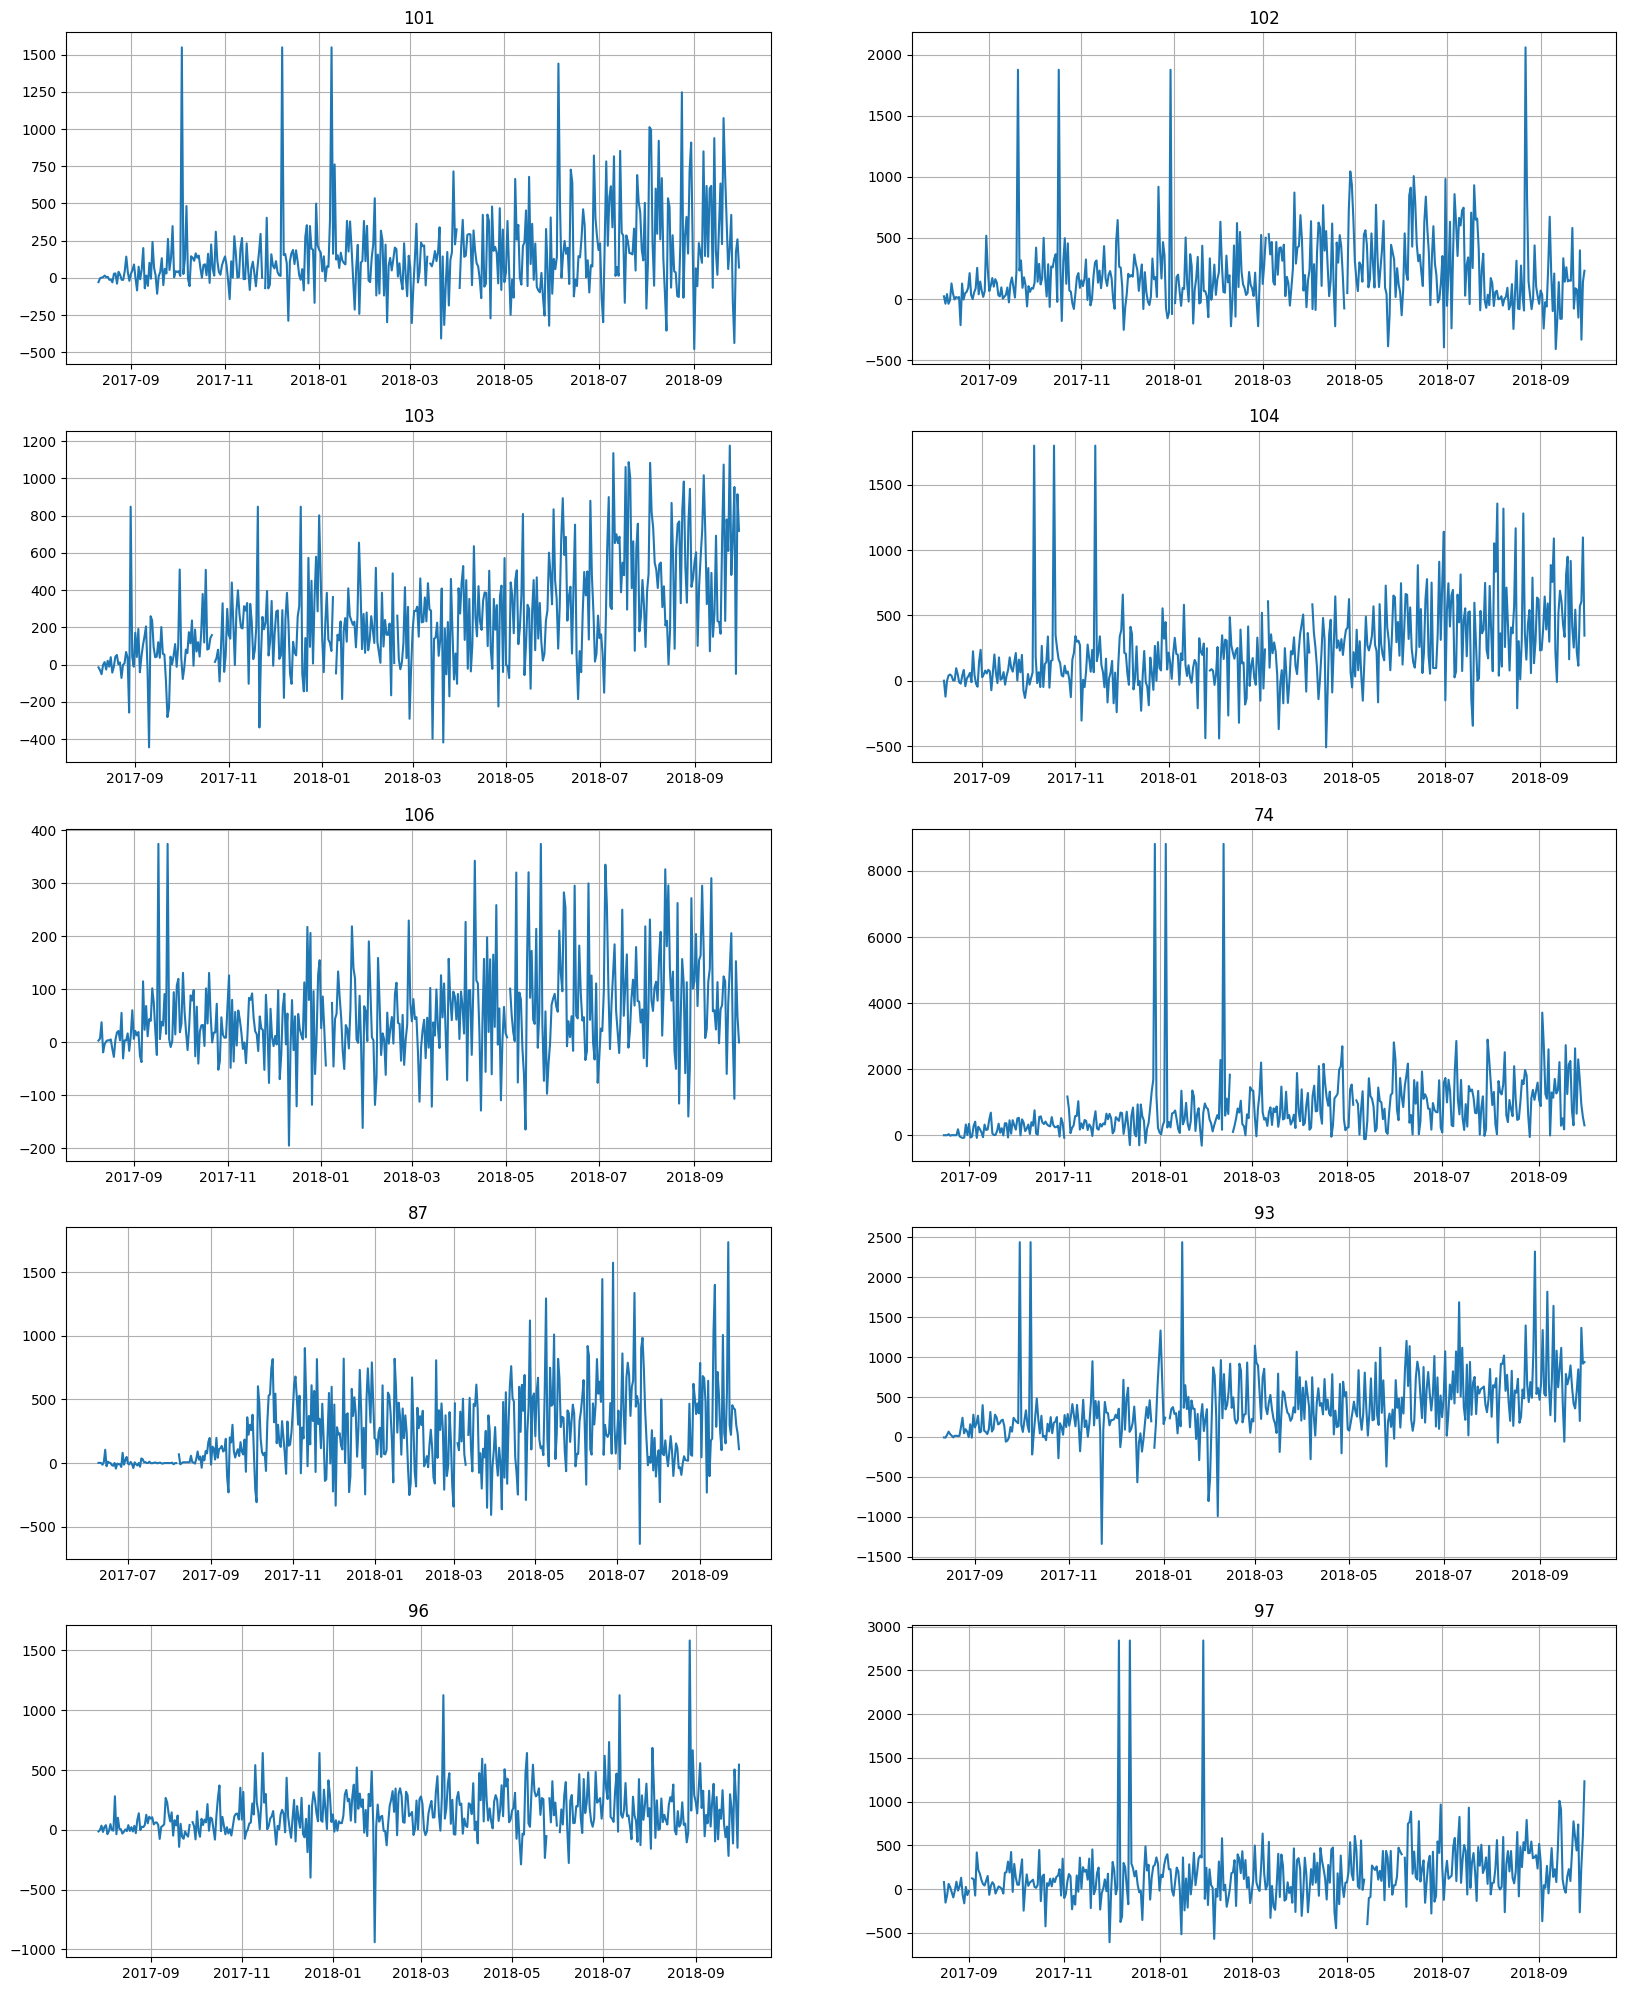

In [ ]:
from etna.datasets import TSDataset
ts = TSDataset(df, freq="D")
ts.plot()

In [ ]:
from etna.analysis import plot_trend
from etna.transforms import LinearTrendTransform
plot_trend(ts, trend_transform=LinearTrendTransform(in_column="target", poly_degree=1))

Output hidden; open in https://colab.research.google.com to view.

Видно, что в целом есть восходящие тренды (относительно слабые) на многих рядах, также есть некоторые ряды с околонулевым трендом

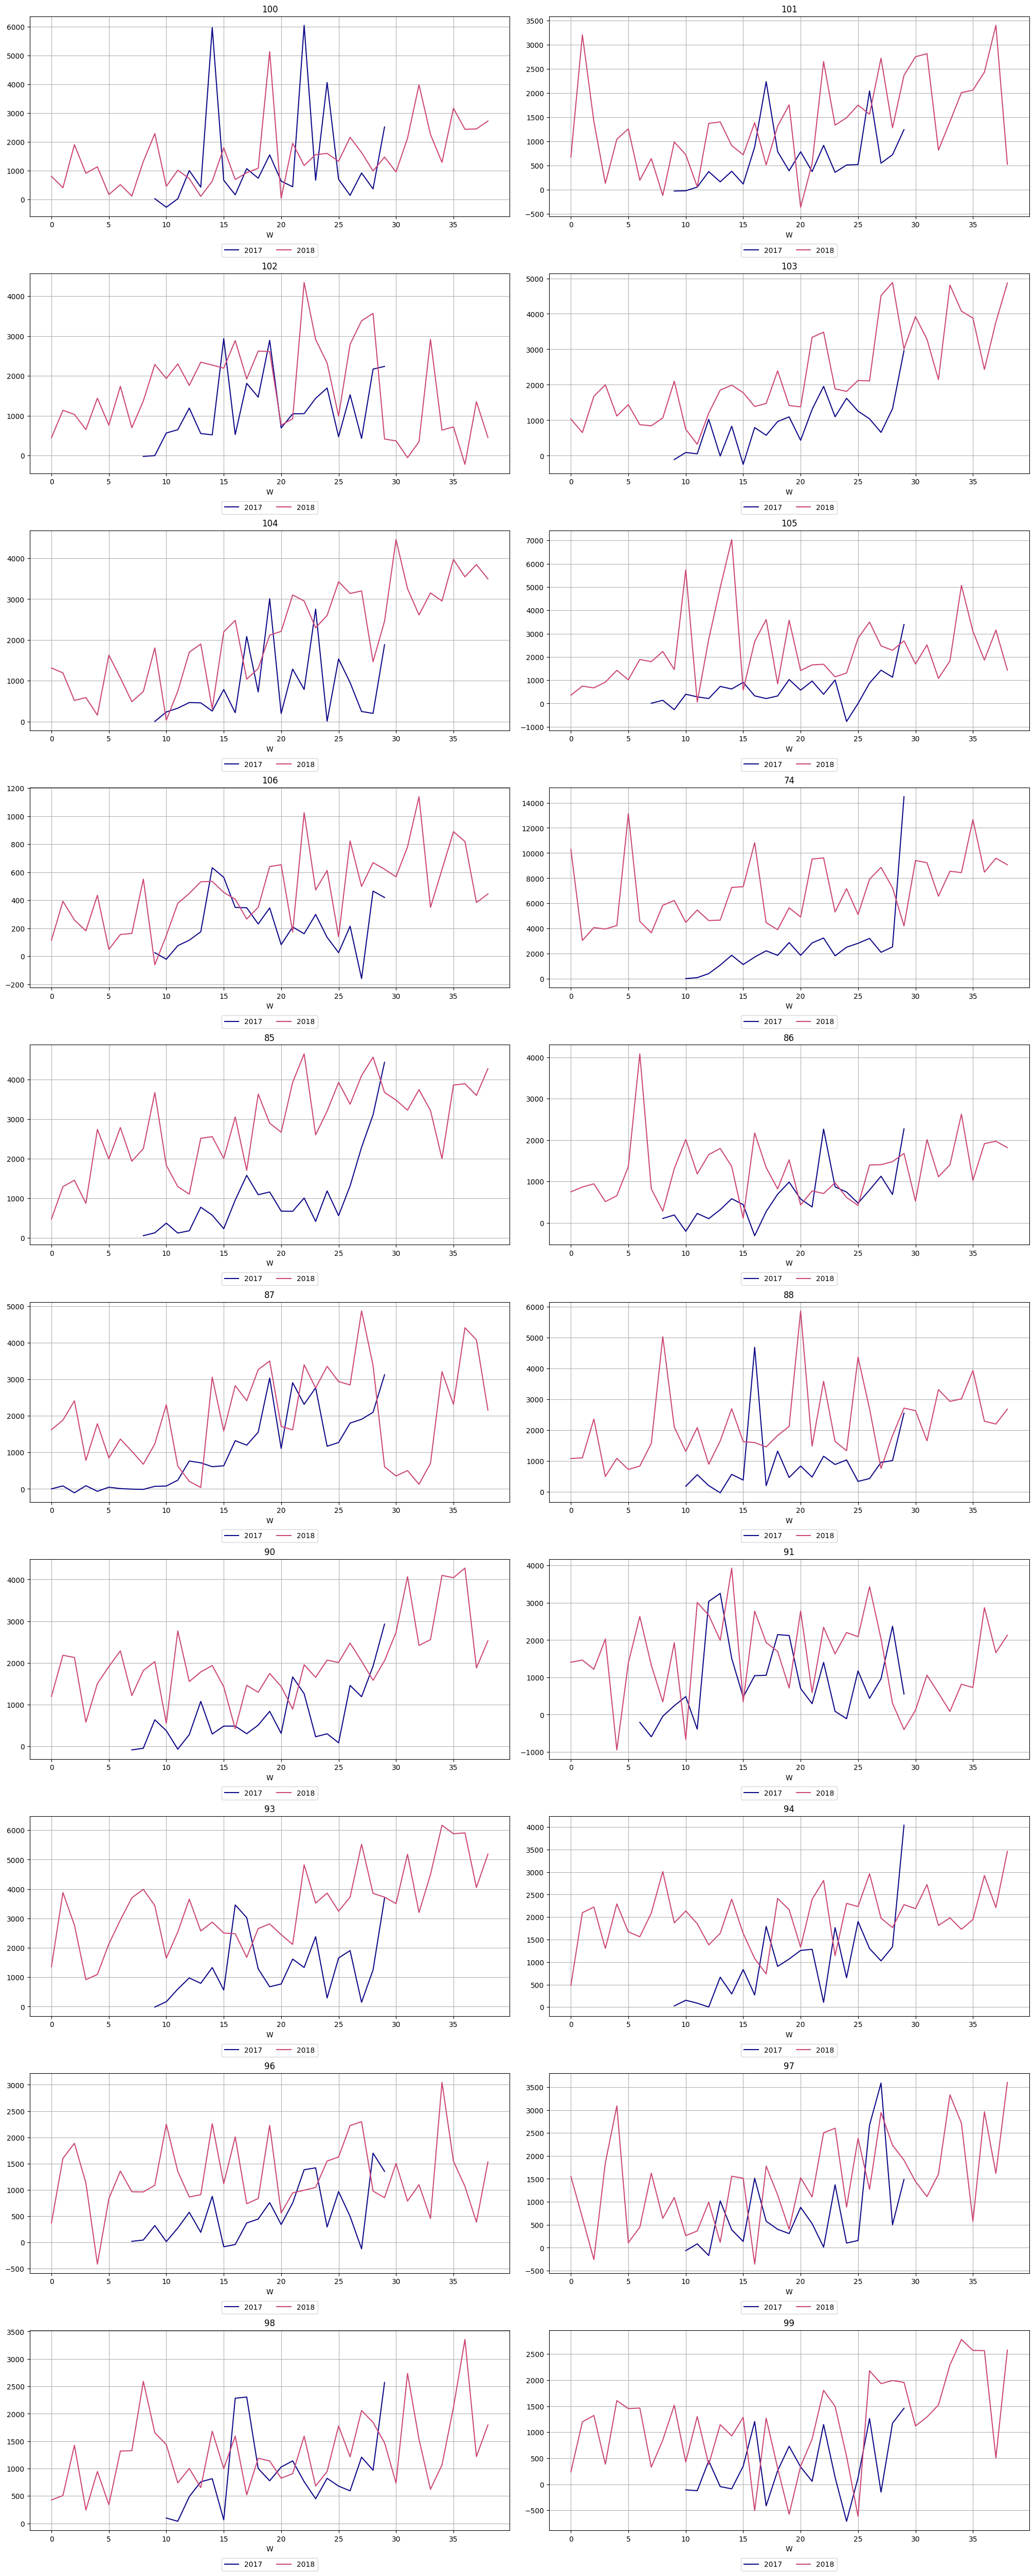

In [ ]:
from etna.analysis import plot_periodogram
from etna.analysis import seasonal_plot
from etna.analysis import stl_plot

seasonal_plot(ts=ts, freq="W")

Явно прослеживается недельная сезонность

Еще можно заметить немного и годовую сезонность. Видно вхождение в общий интервал 2017 и 2018 года при их одновременном наличии.

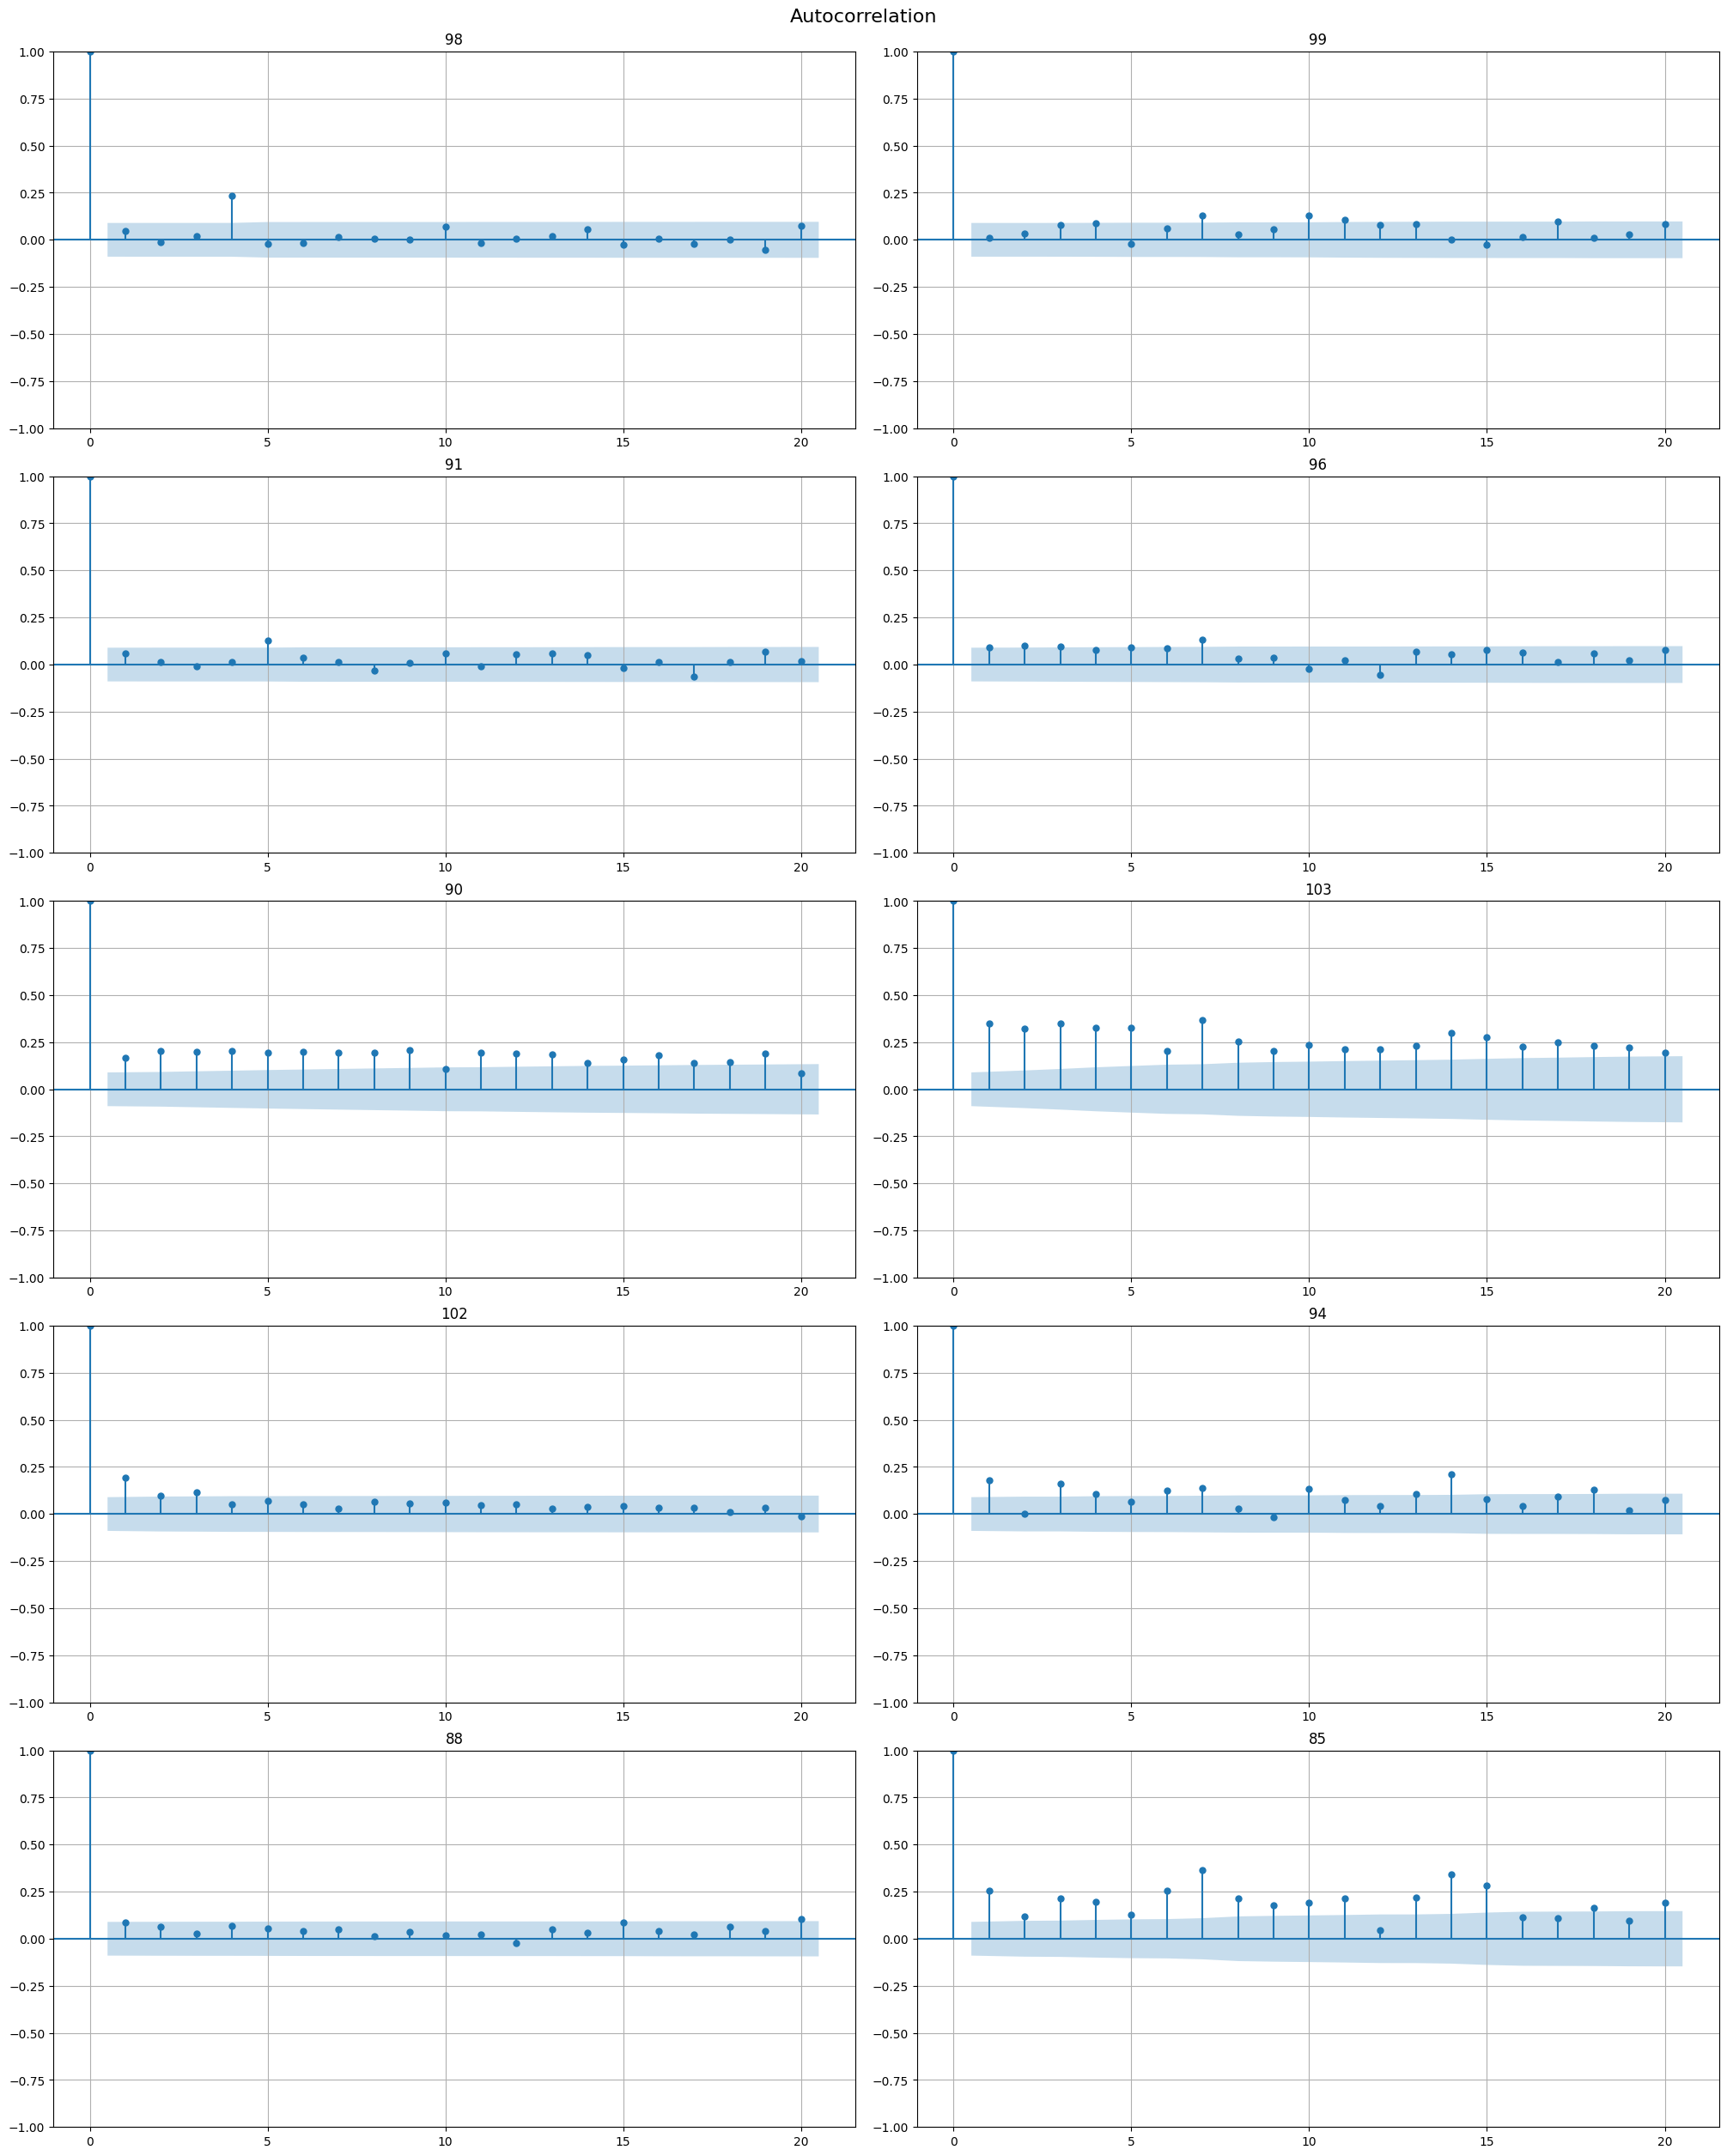

In [ ]:
# теперь посмотрим на корреляции
from etna.analysis import acf_plot
from etna.analysis import cross_corr_plot
from etna.analysis import distribution_plot
from etna.analysis import plot_correlation_matrix
acf_plot(ts, lags=20)

Ну здесь можно зафиксировать следующие мысли:

1. нет какого-то общего лага с заметной корреляцией на все ряды

2. есть в основном два вида рядов: те у которых низкая корреляция на всех лагах; те у которых корреляция заметна (0.3 - 0.4), причем она заметна на протяжении всего интервала значений лагов на графике

3. выделяется 98 банкомат с единственным лагом, имеющим корреляцию 0.25

4. нет отрицательной корреляции (если денег собирают люди больше, то скорее всего не в одном банкомате)

In [ ]:
cross_corr_plot(ts, maxlags=100)

Output hidden; open in https://colab.research.google.com to view.

Между многими рядами есть попарные корреляции

Чтобы точнее понять, между какими конкретно, лучше тепловую карту посмотреть

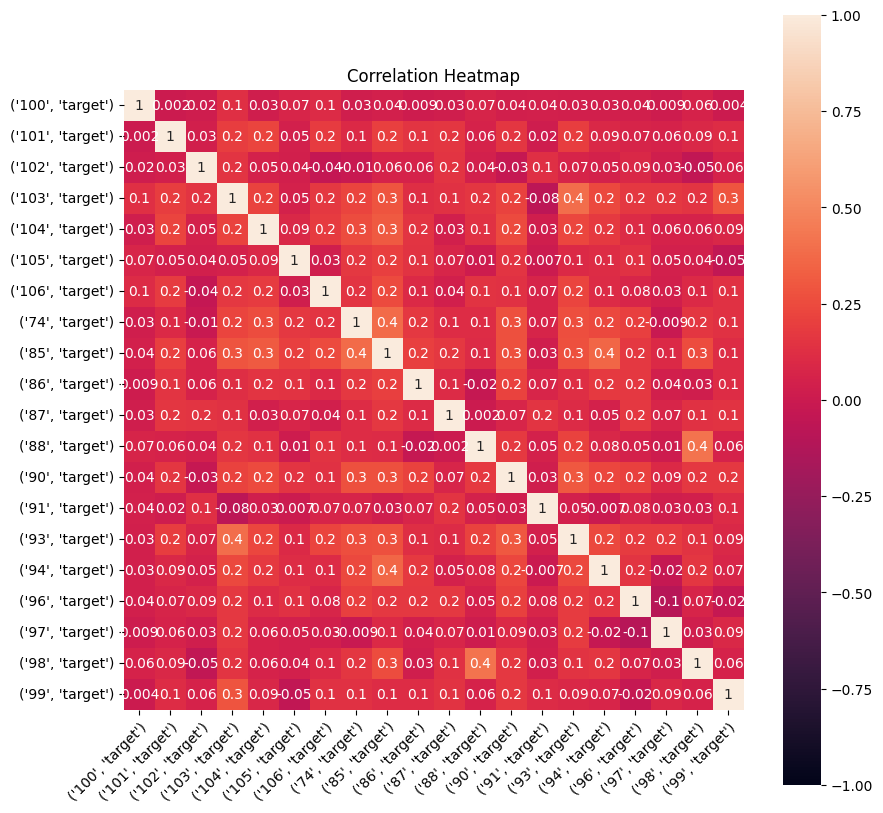

In [ ]:
plot_correlation_matrix(ts)

(98 - 88), (94-85), (93 - 103), (85-74) - между этими банкоматами самая высокая попарная корреляция равная 0.4 - тоже будем помнить при дальнейшем анализе

### Задание 2. Работа с пропущенными значениями и выбросами (1 балл)

Проанализируйте, есть ли в данных пропущенные значения, и подберите оптимальный метод их заполнения средствами ETNA. Какие методы вы выберете и почему? Совет: возможно, лучше сохранить заполненные данные в отдельный объект, поскольку некоторые модели заполняют пропуски встроенными методами, и подача на вход "сырых" данных (на языке временных рядов это данные с нерегулярными интервалами) может принести лучший результат.

Импорты всех необходимых компонент произведите самостоятельно.

Проверьте ряды на наличие выбросов, и очистите их соответствующим образом. Обоснуйте выбор.

Вообще несовсем удобная структура задания, ведь после удаления выбросов появятся пропуски, которые опять нужно будет обработать. Поэтому сначала поработаем с выбросами, затем с пропусками

Воспользуюсь методом на основе плотности, он позволяет не подбирать гиперпараметры - а у меня пока мало опыта с временными рядами, пока с ходу не понимаю, какие окна ставить, чтобы наилучшим образом искать выбросы

In [ ]:
from etna.analysis import get_anomalies_density
from etna.analysis import plot_anomalies
anomaly_dict = get_anomalies_density(ts)
plot_anomalies(ts, anomaly_dict)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 20
num_exogs: 0
num_regressors: 0
num_known_future: 0
freq: D
         start_timestamp end_timestamp  length  num_missing
segments                                                   
100           2017-08-11    2018-09-30     416            3
101           2017-08-11    2018-09-30     416            3
102           2017-08-02    2018-09-30     425            3
103           2017-08-08    2018-09-30     419            3
104           2017-08-07    2018-09-30     420            3
105           2017-07-28    2018-09-30     430            3
106           2017-08-09    2018-09-30     418            3
74            2017-08-16    2018-09-30     411            3
85            2017-08-03    2018-09-30     424            3
86            2017-08-01    2018-09-30     426            3
87            2017-06-09    2018-09-30     479            3
88            2017-08-14    2018-09-30     413            3
90            2017-07-27    2018-09-30     431    

В каждом сегменте есть по три пропуска - и это еще до удаления выбросов, понимаем, что их придется обрабатывать

In [ ]:
from copy import deepcopy
ts_with_nans = deepcopy(ts) # сделаем копию сырых данных

Наткнулся на такую [статью](https://habr.com/ru/companies/tinkoff/articles/677186/)

В ней показаны разные примеры заполнения пропусков через TimeSeriesImputerTransform, самым оптимальным способом согласно статье является скользящее среднее, так как он сможет обработать и подряд идущие пропуски. Его я использую (после удаления выбросов соответственно).

In [ ]:
from etna.transforms import DensityOutliersTransform
from etna.transforms import TimeSeriesImputerTransform
outliers_remover = DensityOutliersTransform(in_column="target")
outliers_imputer = TimeSeriesImputerTransform(in_column="target", strategy="running_mean", window=7)
ts.fit_transform([outliers_remover, outliers_imputer])
# заново взглядем, не осталось ли выбросов
anomaly_dict = get_anomalies_density(ts)
plot_anomalies(ts, anomaly_dict)

Output hidden; open in https://colab.research.google.com to view.

Кайф, предыдущие выбросы исчезли!

In [ ]:
ts.info() # глянем не осталось ли пропусков

<class 'etna.datasets.TSDataset'>
num_segments: 20
num_exogs: 0
num_regressors: 0
num_known_future: 0
freq: D
         start_timestamp end_timestamp  length  num_missing
segments                                                   
100           2017-08-11    2018-09-30     416            0
101           2017-08-11    2018-09-30     416            0
102           2017-08-02    2018-09-30     425            0
103           2017-08-08    2018-09-30     419            0
104           2017-08-07    2018-09-30     420            0
105           2017-07-28    2018-09-30     430            0
106           2017-08-09    2018-09-30     418            0
74            2017-08-16    2018-09-30     411            0
85            2017-08-03    2018-09-30     424            0
86            2017-08-01    2018-09-30     426            0
87            2017-06-09    2018-09-30     479            0
88            2017-08-14    2018-09-30     413            0
90            2017-07-27    2018-09-30     431    

### Задание 3. Построение Prophet (1.25 балла)

Постройте прогнозы с помощью Prophet и `etna.Pipeline`, под капотом `etna.Pipeline` обучит `ProphetModel` для каждого сегмента в отдельности. После этого оцените качество по SMAPE на кросс-валидации. В качестве горизонта предсказания возьмите 5 дней - этого же горизонта будем придерживаться и в дальнейшем.

Отрисуйте получившийся прогноз.

In [ ]:
from etna.pipeline import Pipeline
from etna.models import ProphetModel
from etna.metrics import SMAPE, MAE
from etna.analysis import plot_backtest

In [ ]:
HORIZON = 5
model = ProphetModel()
transforms = []
pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)
metrics_prop, forecasts, _ = pipeline.backtest(ts, metrics=[SMAPE(), MAE()], aggregate_metrics=True, n_folds=3)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvmp752ix/bxrxw5_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvmp752ix/rr2mye4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38319', 'data', 'file=/tmp/tmpvmp752ix/bxrxw5_m.json', 'init=/tmp/tmpvmp752ix/rr2mye4x.json', 'output', 'file=/tmp/tmpvmp752ix/prophet_modelgti7nkln/prophet_model-20240521175226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

In [ ]:
mm = metrics_prop['MAE'].mean()
ms = metrics_prop['SMAPE'].mean()
print(f'Mean MAE: {mm}')
print(f'Mean SMAPE: {ms}')

Mean MAE: 240.6620773797512
Mean SMAPE: 72.06674515656556


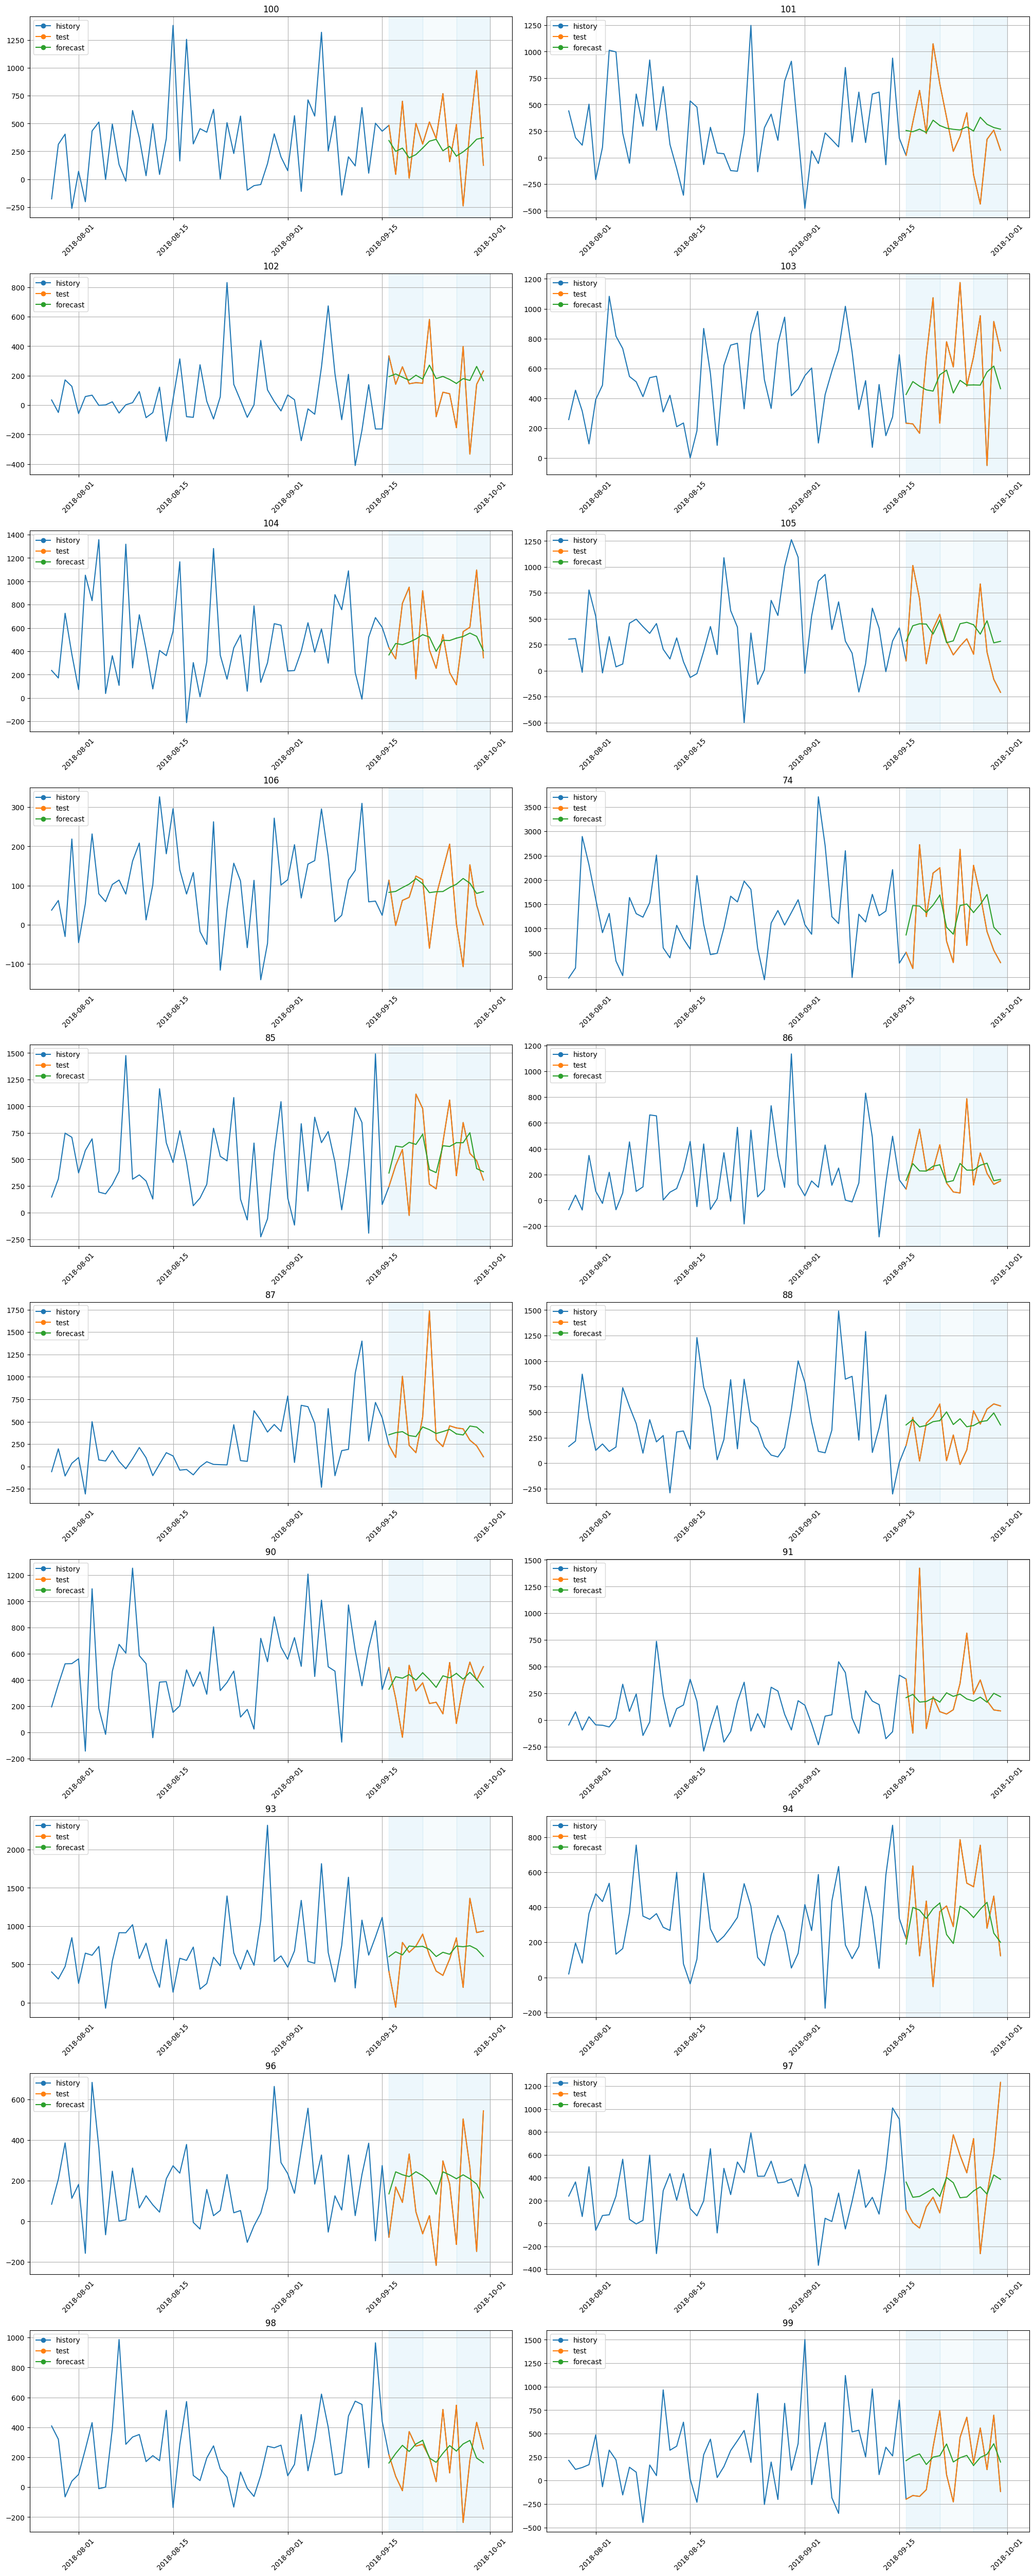

In [ ]:
plot_backtest(forecasts, ts, history_len=50)

Исходя из статистики по каждому ряду, какой можно сделать вывод о том, как лучше предсказывать итоговое значение? Посчитайте то же самое исходя из MAE.

MAE и SMAPE показывают абсолютно различные ошибки на одних и тех же прогнозах.

 Так SMAPE дает большую ошибку тем моделям, которые практически не колебаются и находятся в достаточно маленьком диапазоне - относительно диапазона настоящих ответов прогноз практически не угадывает правильное значение (ряды 106, 96, 99), однако на тех рядах, где прогноз захватывает более обширный общий интервал с настоящими ответами ошибка поменьше. Исходя из этого модели лучше предсказывать значения, которые хоть и будут неправильными, но хотя бы находится недалеко от правильных (условно чтобы прогноз занимал золотую середину, не сильно больше и не сильно меньше)

 MAE совсем по другому. Она не учитывает относительную ошибку (симметричную) и поэтому штрафует просто как за абсолютное отклонение от правильного ответа. Очень хорошо видна разница на 106 ряде, ведь на этом ряде ошибка миинимальна по MAE и одна из самых больших по SMAPE - прогноз во многих точках дал сильно отличающееся значение относительно настоящего ответа, но в целом абсолютное отклонение минимально. Исходя из этого по MAE надо строить прогноз просто стараясь войти в общий интервал с настоящими ответами, нежели SMAPE, которой надо заниать положение примерно посередине.

 В целом у нас достаточно большая ошибка, скорее всего нужно обрабатывать каждый ряд не по отдельности, а рассматривать итоговую наличность из всех банкоматов. Изначально было достаточно подозрительно рассматривать ряды всех сегментов...

### Задание 4. Иерархический временной ряд (2 балла)

Вопрос, поставленный в прошлом задании, тем не менее, естественным образом подводит нас к концепции **иерархического временного ряда** (когда один ряд состоит из других в качестве компонент). Это полезная концепция, которая может встретиться во многих задачах. В этом задании вам предстоит самостоятельно разобраться в деталях ее реализации в ETNA с использованием справочных материалов, предоставляемых библиотекой (как это часто бывает на практике). Они содержатся по следующей ссылке:

https://github.com/etna-team/etna/blob/master/examples/303-hierarchical_pipeline.ipynb

На выходе из первой части задания необходимо получить `TSDataset` с иерархической структурой, а также соответствующий реконсилятор, который позволит собирать искомый ряд из составных компонент. Классы, которые вам понадобятся, импортированы ниже.

In [ ]:
from etna.datasets import HierarchicalStructure
from etna.pipeline import HierarchicalPipeline
from etna.reconciliation import TopDownReconciliator

Несовсем понятно, какую конкретно иерархию надо было сделать, тем более с TopDownReconciliator, поэтому по своей чуйке буду составлять ее, авось угадаю...

Короче рассуждал я так: ряды, где числа побольше - верхние, где поменьше - нижние...

К сожалению, вообще на дали нам никакого описания к датасету и настоящей иерархии нам не узнать, поэтому ошибка на предсказаниях скорее всего будет гигантской :)

In [ ]:
df_hier = df.copy()
df_hier['target'] = abs(df['target'].min()) + df_hier['target'] # делаем сдвиг, потому что TopDownReconciliator не принимает отрицательные числа

In [ ]:
hierarchical_structure = HierarchicalStructure(level_structure={"total": ['74', '85', '86', '87', '88', '90', '91', '93', '94', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106']}, level_names=["total", "ATM"])
hierarchical_ts = TSDataset(df=df_hier, freq="D", hierarchical_structure=hierarchical_structure)

reconciliator = TopDownReconciliator(target_level="ATM", source_level="total", method="AHP", period=10)

Во второй части задания примените найденные на предыдущих этапах преобразования очистку от выбросов уже к иерархическому датасету, и запустите на нем Prophet с MAE на кросс-валидации.

In [ ]:
HORIZON = 5
model = ProphetModel()
transforms = []
outliers_remover = DensityOutliersTransform(in_column="target")
outliers_imputer = TimeSeriesImputerTransform(in_column="target", strategy="running_mean", window=7)
transforms = [outliers_remover, outliers_imputer]
pipeline = HierarchicalPipeline(model=model, transforms=transforms, reconciliator=reconciliator, horizon=HORIZON)
metrics, forecasts, _ = pipeline.backtest(ts=hierarchical_ts, metrics=[MAE()], n_folds=3, aggregate_metrics=True)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvmp752ix/11pneq96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvmp752ix/lqrrpetb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69278', 'data', 'file=/tmp/tmpvmp752ix/11pneq96.json', 'init=/tmp/tmpvmp752ix/lqrrpetb.json', 'output', 'file=/tmp/tmpvmp752ix/prophet_modelsnqote_3/prophet_model-20240521182221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:22:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
[Parallel(n_jobs=1)]: Done   1 tasks    

In [ ]:
mm = metrics['MAE'].mean()
print(f'Mean MAE: {mm}')

Mean MAE: 269.72292295213657


In [ ]:
metrics_prop['MAE'].mean()

240.6620773797512

Как и ожидалось, по метрикам будет хуже. Никто не гарантировал, что оригинальная иерархия банкоматов именно такая...

### Задание 5. Построение признаков (1.5 балла)

Вернемся к нашему исходному мультисегментному ряду - теперь поработаем с моделями, которые требуют построения признаков - `ARIMA` и `CatBoost`. Построим для них признаки, и попробуем при помощи них добиться улучшения качества.

Из обязательного:
1) постройте графики автокорреляции и при помощи них обоснуйте выбор лаговых признаков
2) для катбуста включите в признаки результаты STL разложения. STL используем для убирания тренда за счет преобразования на месте.
* Кроме этого, подумайте на экспертном уровне,
    - Какие еще закономерности могут присутствовать и почему?
    - Что из этого кажется более предсказуемым, и почему?
    - Cделайте соответствующие признаки, и снабдите их кратким комментарием.

3) После этого, обучите на получившихся признаках модели. Для `CatBoost` рассмотрите 2 версии мультисегментную и на каждый ряд в отдельности.

Ниже приведены импорты, которые вам точно понадобятся - к ним необходимо добавить те инструменты, которые вы дополнительно решите использовать в анализе.

In [ ]:
from etna.analysis import acf_plot, stl_plot
from etna.ensembles import DirectEnsemble, StackingEnsemble, VotingEnsemble
from etna.models import (CatBoostMultiSegmentModel, CatBoostPerSegmentModel,
                         AutoARIMAModel)
from etna.transforms import STLTransform, LagTransform, SegmentEncoderTransform, QuantileTransform

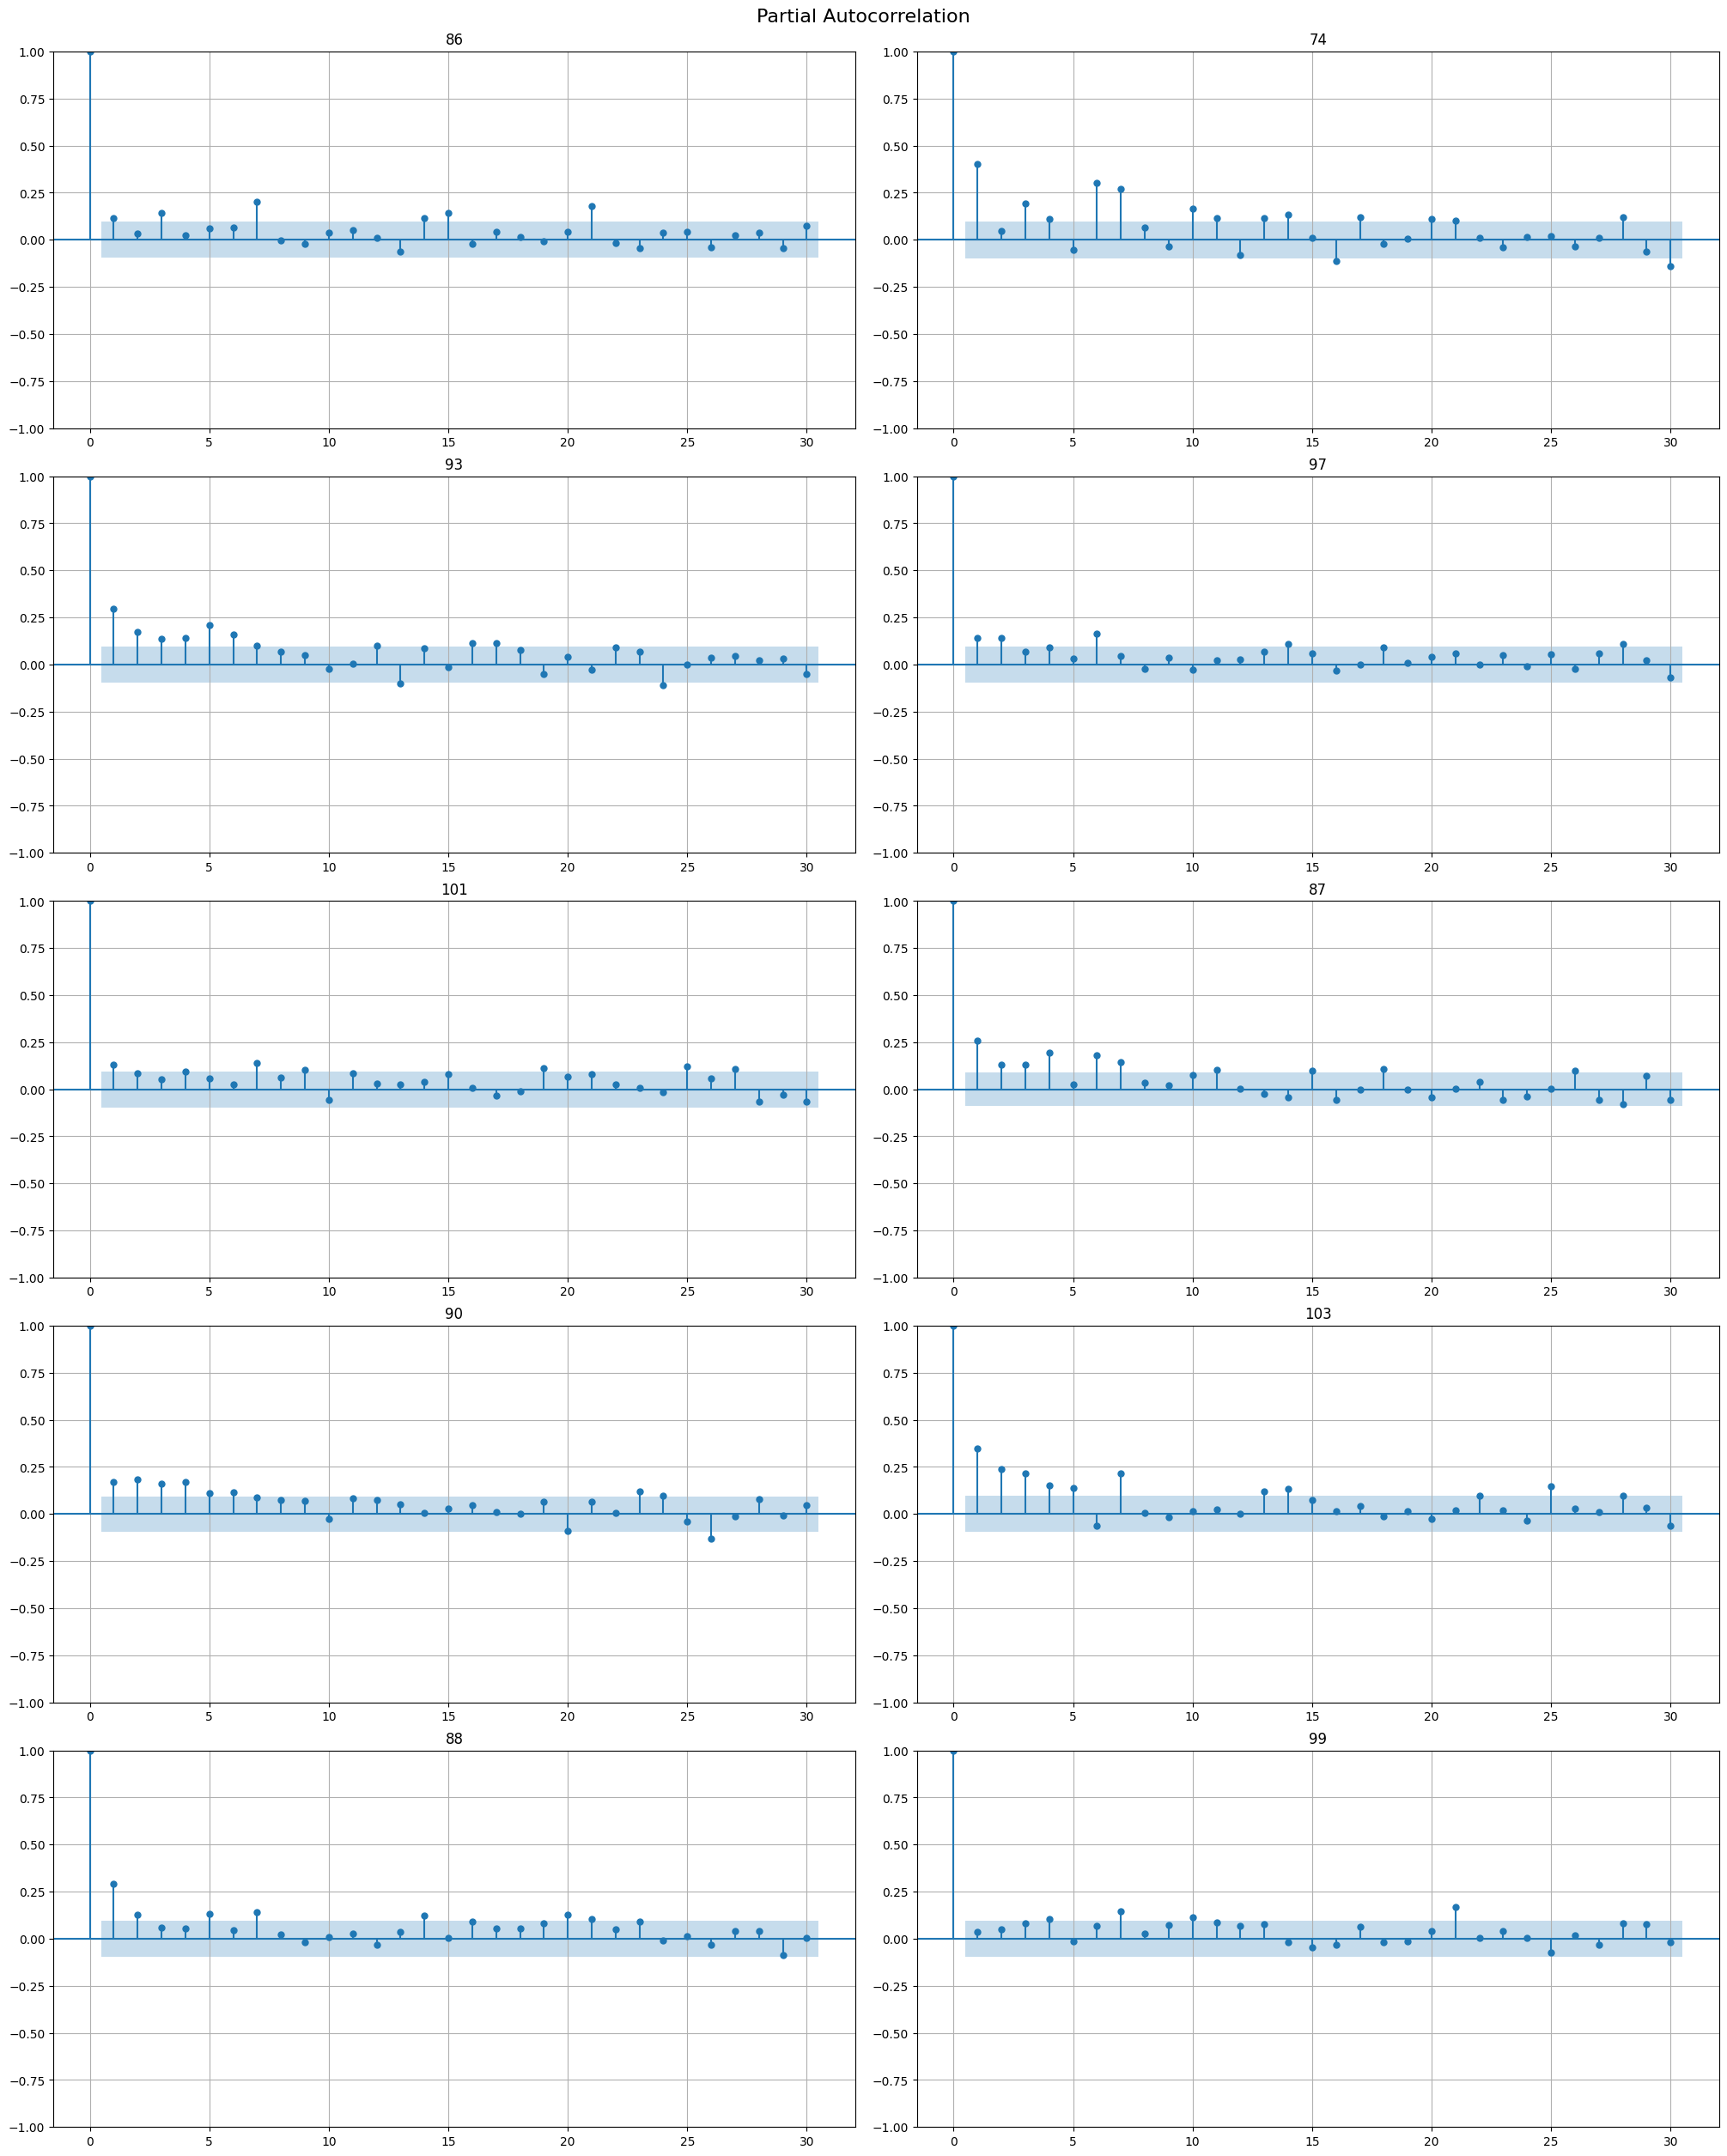

In [ ]:
acf_plot(ts, partial=True, lags=30)

В большинтсве рядов самая сильная корреляция присутствует лагах от 1 до 12-15, однако меньше 5 нельзя брать, поэтому возьму от 5 до 18 через одного

По поводу признаков: точно бы закодировал метку сегмента, многие банкоматы отличаются количеством наличности и другими своими статистиками; также я бы добавил признак квантиля (0.5 в окне 7) - это значени скорее всего уникально для каждого ряда в зависимости от состояния других признаков, и будет показывать примерно около какого значения надо генерить значения

In [ ]:
# создание признаков
lags = LagTransform(in_column="target", lags=list(range(5, 18, 2)))
stl = STLTransform(in_column="target", period=7, model="arima")
qt = QuantileTransform(in_column="target", quantile=0.5, window=7)
se = SegmentEncoderTransform()
HORIZON = 5

In [ ]:
ts_for_model = deepcopy(ts)
train_ts, test_ts = ts_for_model.train_test_split(test_size=HORIZON)
model = CatBoostMultiSegmentModel()
pipeline_CBMulti = Pipeline(model=model, transforms=[lags, stl, qt, se], horizon=HORIZON)
pipeline_CBMulti.fit(ts_for_model)
forecast_ts = pipeline_CBMulti.forecast(train_ts)

smape = SMAPE()
errors = smape(y_true=test_ts, y_pred=forecast_ts)
ms = np.mean([errors[key] for key in errors])

mae = MAE()
errors = mae(y_true=test_ts, y_pred=forecast_ts)
mm = np.mean([errors[key] for key in errors])
print(f'CatBoostMultiSegment mean MAE: {mm}')
print(f'CatBoostMultiSegment mean SMAPE: {ms}')

CatBoostMultiSegment mean MAE: 127.55285621459163
CatBoostMultiSegment mean SMAPE: 57.29185301268126


In [ ]:
ts_for_model = deepcopy(ts)
train_ts, test_ts = ts_for_model.train_test_split(test_size=HORIZON)
model = CatBoostPerSegmentModel()
pipeline_CBPS = Pipeline(model=model, transforms=[lags, stl, qt, se], horizon=HORIZON)
pipeline_CBPS.fit(train_ts)
forecast_ts = pipeline_CBPS.forecast(train_ts)

smape = SMAPE()
errors = smape(y_true=test_ts, y_pred=forecast_ts)
ms = np.mean([errors[key] for key in errors])

mae = MAE()
errors = mae(y_true=test_ts, y_pred=forecast_ts)
mm = np.mean([errors[key] for key in errors])
print(f'CatBoostPerSegment mean MAE: {mm}')
print(f'CatBoostPerSegment mean SMAPE: {ms}')

CatBoostPerSegment mean MAE: 331.99813026480786
CatBoostPerSegment mean SMAPE: 99.20302524772278


In [ ]:
ts_for_model = deepcopy(ts)
train_ts, test_ts = ts_for_model.train_test_split(test_size=HORIZON)
model = AutoARIMAModel()
pipeline_arima = Pipeline(model=model, transforms=[lags, qt, se], horizon=HORIZON)
pipeline_arima.fit(train_ts)
forecast_ts = pipeline_arima.forecast(train_ts)

smape = SMAPE()
errors = smape(y_true=test_ts, y_pred=forecast_ts)
ms = np.mean([errors[key] for key in errors])

mae = MAE()
errors = mae(y_true=test_ts, y_pred=forecast_ts)
mm = np.mean([errors[key] for key in errors])
print(f'Mean MAE: {mm}')
print(f'Mean SMAPE: {ms}')

Mean MAE: 274.73397515452893
Mean SMAPE: 85.29045268529532


На CatBoostMultiSegmentModel получилось добиться улучшения по метрикам, однако на ARIMA и CatBoostPerSegmentModel показали результат похуже. Скорее всего нужно другие признаки какие-то подобрать.

### Задание 6. Стратегии прогнозирования (1.25 балла)

Как нам известно по семинарским занятиям, при построении прогноза на горизонте дальше следующего наблюдения перед нами встает задача определиться со стратегией генерации прогноза. Попробуйте разные стратегии на нашем горизонте из 5 дней (прямая, рекурсивная). Какая стратегия в совокупности с какой моделью дает лучший результат?

Учитывайте особенности, которые некоторые стратегии могут накладывать на признаки (в частности, на лаговые переменные).

При необходимости, в смешанном методе пользуйтесь упрощенной схемой спецификации моделей/преобразований.

In [ ]:
from etna.pipeline import AutoRegressivePipeline, Pipeline, assemble_pipelines
from etna.ensembles import DirectEnsemble

In [ ]:
# AutoARIMAModel pipeline

ts_for_model = deepcopy(ts)
model = AutoARIMAModel()
pipeline_arima = Pipeline(model=model, transforms=[lags, qt, se], horizon=HORIZON)

metrics_df, forecast_df, _ = pipeline_arima.backtest(ts=ts_for_model, metrics=[SMAPE(), MAE()])

ms = metrics_df['SMAPE'].mean()
mm = metrics_df['MAE'].mean()
print(f'ARIMA pipeline backtest mean MAE: {mm}')
print(f'ARIMA pipeline backtest mean SMAPE: {ms}')

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   21.9s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   52.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  2.5min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    9.9s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   14.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   18.8s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   24.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   24.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s


ARIMA pipeline backtest mean MAE: 275.6567317806773
ARIMA pipeline backtest mean SMAPE: 81.52610863113865


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.3s


In [ ]:
# CatBoostPerSegmentModel pipeline

ts_for_model = deepcopy(ts)
model = CatBoostPerSegmentModel()
pipeline_CBPS = Pipeline(model=model, transforms=[lags, stl, qt, se], horizon=HORIZON)

metrics_df, forecast_df, _ = pipeline_CBPS.backtest(ts=ts_for_model, metrics=[SMAPE(), MAE()])

ms = metrics_df['SMAPE'].mean()
mm = metrics_df['MAE'].mean()
print(f'CatBoostPerSegment pipeline backtest mean MAE: {mm}')
print(f'CatBoostPerSegment pipeline backtest mean SMAPE: {ms}')

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  2.1min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  3.0min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  4.0min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  5.2min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  5.2min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   12.7s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   18.4s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   25.4s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   31.5s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   31.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Do

CatBoostPerSegment pipeline backtest mean MAE: 399.91386425092975
CatBoostPerSegment pipeline backtest mean SMAPE: 102.96719203047488


In [ ]:
# CatBoostMultiSegmentModel pipeline

ts_for_model = deepcopy(ts)
model = CatBoostMultiSegmentModel()
pipeline_CBMS = Pipeline(model=model, transforms=[lags, stl, qt, se], horizon=HORIZON)

metrics_df, forecast_df, _ = pipeline_CBMS.backtest(ts=ts_for_model, metrics=[SMAPE(), MAE()])

ms = metrics_df['SMAPE'].mean()
mm = metrics_df['MAE'].mean()
print(f'CatBoostMultiSegment pipeline backtest mean MAE: {mm}')
print(f'CatBoostMultiSegment pipeline backtest mean SMAPE: {ms}')

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   23.8s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   34.3s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   45.6s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   57.3s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   57.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   12.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   18.5s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   25.1s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   31.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   31.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s


CatBoostMultiSegment pipeline backtest mean MAE: 390.20613454354367
CatBoostMultiSegment pipeline backtest mean SMAPE: 101.12615828042824


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.3s


In [ ]:
lags = LagTransform(in_column="target", lags=list(range(5, 16, 2)), out_column="target_lag") # теперь лаги можно делать меньше HORIZON '''16, 2'''

In [ ]:
# AutoARIMAModel recursive

ts_for_model = deepcopy(ts)

model = AutoARIMAModel()
autoregressivepipeline = AutoRegressivePipeline(model=model, transforms=[], horizon=HORIZON, step=1)

metrics_recursive_df, forecast_recursive_df, _ = autoregressivepipeline.backtest(ts=ts_for_model, metrics=[SMAPE(), MAE()])

ms = metrics_recursive_df['SMAPE'].mean()
mm = metrics_recursive_df['MAE'].mean()
print(f'ARIMA recursive backtest mean MAE: {mm}')
print(f'ARIMA recursive backtest mean SMAPE: {ms}')

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.0min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  5.7min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  8.2min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed: 11.2min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed: 13.9min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed: 13.9min
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic pred

ARIMA recursive backtest mean MAE: 274.1103064889165
ARIMA recursive backtest mean SMAPE: 79.6656125334429


[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.2s


In [ ]:
# CatBoostPerSegmentModel recursive

ts_for_model = deepcopy(ts)

model = CatBoostPerSegmentModel()
autoregressivepipeline = AutoRegressivePipeline(model=model, transforms=[lags, stl, qt, se], horizon=HORIZON, step=1)

metrics_recursive_df, forecast_recursive_df, _ = autoregressivepipeline.backtest(ts=ts_for_model, metrics=[SMAPE(), MAE()])

ms = metrics_recursive_df['SMAPE'].mean()
mm = metrics_recursive_df['MAE'].mean()
print(f'CatBoostPerSegment recursive backtest mean MAE: {mm}')
print(f'CatBoostPerSegment recursive backtest mean SMAPE: {ms}')

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   56.7s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  2.8min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  3.7min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  4.7min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  4.7min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   35.4s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  3.1min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  3.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.2s


CatBoostPerSegment recursive backtest mean MAE: 380.86224858925976
CatBoostPerSegment recursive backtest mean SMAPE: 102.47833648908781


[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.2s


In [ ]:
# CatBoostMultiSegmentModel recursive
ts_for_model = deepcopy(ts)
model = CatBoostMultiSegmentModel()
autoregressivepipeline = AutoRegressivePipeline(model=model, transforms=[lags, stl, qt, se], horizon=HORIZON, step=1)

metrics_recursive_df, forecast_recursive_df, _ = autoregressivepipeline.backtest(ts=ts_for_model, metrics=[SMAPE(), MAE()])

ms = metrics_recursive_df['SMAPE'].mean()
mm = metrics_recursive_df['MAE'].mean()
print(f'CatBoostMultiSegment recursive backtest mean MAE: {mm}')
print(f'CatBoostMultiSegment recursive backtest mean SMAPE: {ms}')

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.5s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   23.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   35.8s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   48.3s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   36.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  3.1min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  3.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Do

CatBoostMultiSegment recursive backtest mean MAE: 370.15206579968753
CatBoostMultiSegment recursive backtest mean SMAPE: 98.90511677199004


Самая лучшая оказалась ARIMA с Autoregressive прогнозированием. Скорее всего потому что там я не использовал никаких признаков, так как модель ругается, что они не двумерные. А как это исправить, нигде не написано...

### Задание 7. Ансамбли (1.25 балла)

Чтобы не выбирать лучшую модель, мы можем использовать преимущества каждой - давайте объединим все наши наработки в ансамбль. Попробуйте различные опции ансамблирования, и выберите ту, которая работает лучше всего (не забывайте, что внутри каждого ансамбля у нас тоже есть параметры, которые мы можем варьировать - веса в voting, включаемые признаки в stacking).

In [ ]:
from etna.ensembles import StackingEnsemble, VotingEnsemble

In [ ]:
pipelines = []
pipelines.append(Pipeline(model=AutoARIMAModel(), transforms=[lags, qt, se], horizon=HORIZON))
pipelines.append(Pipeline(model=CatBoostPerSegmentModel(), transforms=[lags, stl, qt, se], horizon=HORIZON))
pipelines.append(Pipeline(model=CatBoostMultiSegmentModel(), transforms=[lags, stl, qt, se], horizon=HORIZON))
pipelines.append(AutoRegressivePipeline(model=AutoARIMAModel(), transforms=[], horizon=HORIZON, step=1))
pipelines.append(AutoRegressivePipeline(model=CatBoostPerSegmentModel(), transforms=[lags, stl, qt, se], horizon=HORIZON, step=1))
pipelines.append(AutoRegressivePipeline(model=CatBoostMultiSegmentModel(), transforms=[lags, stl, qt, se], horizon=HORIZON, step=1))

In [ ]:
voting_ensemble = VotingEnsemble(pipelines=pipelines, weights=[3, 8, 4, 10, 5, 6])
voting_ensamble_metrics = voting_ensemble.backtest(
    ts=ts,
    metrics=[SMAPE(), MAE()], n_jobs=3
)

res = voting_ensamble_metrics[0].iloc[:, 1:]
ms = res['SMAPE'].mean()
mm = res['MAE'].mean()
print(f'VotingEnsemble backtest mean MAE: {mm}')
print(f'VotingEnsemble backtest mean SMAPE: {ms}')

VotingEnsemble backtest mean MAE: 323.4545958575971
VotingEnsemble backtest mean SMAPE: 89.83536813379482


В общем получилось неплохо, но похуже, чем на лучшей модели из прошлого задания. Это связано с тем, что я задействовал не только ее в ансамбле. Немного поигрался с весами - самый лучший вариант получился с моделью, которая выше.

In [ ]:
stacking_ensemble_unfeatured = StackingEnsemble(pipelines=pipelines, n_jobs=4, features_to_use=[lags, se])
stacking_ensamble_metrics = stacking_ensemble_unfeatured.backtest(
    ts=ts,
    metrics=[SMAPE(), MAE()],
    aggregate_metrics=True,
    n_jobs=2
  )

res = stacking_ensamble_metrics[0].iloc[:, 1:]
ms = res['SMAPE'].mean()
mm = res['MAE'].mean()
print(f'StackingEnsemble backtest mean MAE: {mm}')
print(f'StackingEnsemble backtest mean SMAPE: {ms}')

StackingEnsemble backtest mean MAE: 280.93022019452377
StackingEnsemble backtest mean SMAPE: 77.74256198988448


StackingEnsemble с меньшим количеством признаков обучился получше, но зато целых три часа. В целом логично, скорее всего несовсем правильные признаки подобраны мной...

Вообще, самая лучшая модель была бы какая-нибудь одна ARIMA без пайплайнов и доп признаков, но я решил оставить два разных вида, так как цель все таки - адекватно ознакомиться с корпоративной библиотекой желтого банка и анализом временных рядов!

### Задание 8*. Трансформер (бонус 2 балла)

Для желающих протестировать мощь трансформенных моделей предлагается "завести" модель из второго семинара по временным рядам на текущем датасете. На этот раз абсолютно все необходимые импорты и зависимости подгружаются на ваше усмотрение. Удалось ли вам улучшить качество по сравнению с классическими моделями / моделями на основе ML? Что бы вы предпочли внедрить в production?

*NB:* все, конечно, прекрасно знают механизм работы бонусных заданий, но порядка ряди прописать дисклеймер должны - итоговый балл за домашнее задание ставится по формуле min(10, ваш суммарный балл за задания).